<a href="https://colab.research.google.com/github/ProxCentauri/Python-Tutorials-/blob/main/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Generate a simple sine wave
def generate_sine_wave(seq_length, num_samples):
    X = []
    y = []
    for _ in range(num_samples):
        start = np.random.uniform(0, 2 * np.pi)
        x = np.array([np.sin(start + i) for i in range(seq_length)])
        X.append(x[:-1])
        y.append(x[1:])
    return np.array(X), np.array(y)

seq_length = 50
num_samples = 1000
X, y = generate_sine_wave(seq_length, num_samples)

# Reshape data for RNN
X = X.reshape((num_samples, seq_length - 1, 1))
y = y.reshape((num_samples, seq_length - 1, 1))

In [3]:
model = Sequential([
    SimpleRNN(50, activation='tanh', input_shape=(seq_length - 1, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 50)                  │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
history = model.fit(X, y, epochs=20, validation_split=0.2, verbose=1)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.5412 - val_loss: 0.5028
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.5010 - val_loss: 0.4999
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4995 - val_loss: 0.4998
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4997 - val_loss: 0.4998
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4998 - val_loss: 0.4998
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4996 - val_loss: 0.4998
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4995 - val_loss: 0.4998
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4996 - val_loss: 0.4998
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.4994 - val_loss: 0.4998
Epoch 10/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4992 - val_loss: 0.4998
Epoch 11/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4995 - val_loss: 0.4998
Epoch 12/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4994 

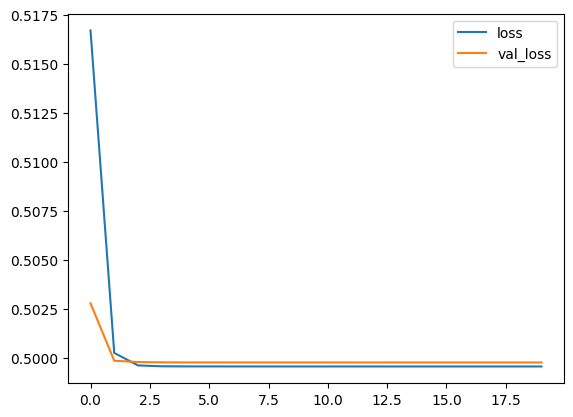

In [5]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


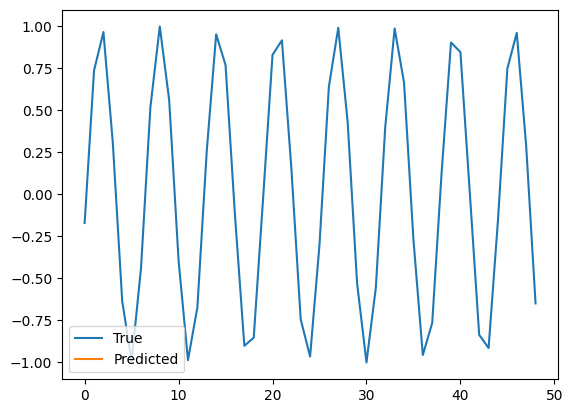

In [6]:
# Generate a new sine wave for testing
X_test, y_test = generate_sine_wave(seq_length, 1)
X_test = X_test.reshape((1, seq_length - 1, 1))
y_test = y_test.reshape((1, seq_length - 1, 1))

predictions = model.predict(X_test)

# Plot the results
plt.plot(y_test[0], label='True')
plt.plot(predictions[0], label='Predicted')
plt.legend()
plt.show()